In [ ]:
%matplotlib inline

import numpy as np # NUMPY
import pandas as pd # PANDAS
import matplotlib.pyplot as plt # MATPLOTLIB
import seaborn as sns # SEABORN
import scipy
import sklearn
from sklearn.decomposition import PCA
import cv2
import os 
from skimage import filters
from scipy import ndimage

In [2]:
cant_frames_per_seq = pd.read_csv('ckmock_landmark_FramePerSeq.csv',header = None)
cant_frames_per_seq = np.asarray(cant_frames_per_seq).flatten()
subject_images = []
warpimgpath = '../ck+warped'
for i in range(0, len(os.listdir(warpimgpath))):
    subject_images.append('../ck+warped/' + 'warped_image_procustres_' + str(i)+'.png')
subject_images = np.asarray(subject_images)

img = cv2.imread(subject_images[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
width, height = img.shape
width, height

(490, 640)

In [4]:
img = cv2.imread(subject_images[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Texture start", img)
# Pause screen to wait key from user to see result
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("ejemplotex.png", img)

True

In [4]:
GradX = cv2.Sobel(img, ddepth=-1, dx=1, dy=0, borderType=cv2.BORDER_REFLECT)
GradY = cv2.Sobel(img, ddepth=-1, dx=0, dy=1, borderType=cv2.BORDER_REFLECT)
GradY[:, -1] = 0
Hori = np.concatenate((GradX, GradY), axis=1) 
cv2.imshow('HORIZONTAL', Hori) 
cv2.waitKey(0) 
cv2.destroyAllWindows()  # esto tampoco es

In [5]:
GradX, GradY = np.gradient(img)      
GradX[-1,:] = 0
GradY[:, -1] = 0 # Neumann boundary Condition
Hori = np.concatenate((GradX, GradY), axis=1) 
cv2.imshow('HORIZONTAL', Hori) 
cv2.waitKey(0) 
cv2.destroyAllWindows()  # esto tampoco es

In [6]:
Kx = -1*np.array([[-1,0,1]])
GradX = ndimage.convolve(img, Kx)

#-Derivative y
Ky = -1*np.array([[-1],[0],[1]])
GradY = ndimage.convolve(img, Ky)
GradX[-1,:] = 0
GradY[:, -1] = 0 # Neumann boundary Condition   
Hori = np.concatenate((GradX, GradY), axis=1) 
cv2.imshow('HORIZONTAL', Hori) 
cv2.waitKey(0) 
cv2.destroyAllWindows()  # esto tampoco es

In [5]:
from skimage import filters

def ComputeImageGradient(image, way):
    if way == 0:
        GradX = cv2.Sobel(image, ddepth=-1, dx=1, dy=0, borderType=cv2.BORDER_REFLECT)
        GradY = cv2.Sobel(image, ddepth=-1, dx=0, dy=1, borderType=cv2.BORDER_REFLECT)
        GradX[-1,:] = 0
        GradY[:, -1] = 0 # Neumann boundary Condition
    elif way == 1:
        GradX, GradY = np.gradient(image)      
        GradX[-1,:] = 0
        GradY[:, -1] = 0 # Neumann boundary Condition     
    elif way == 2: 
        Kx = -1*np.array([[-1,0,1]])
        GradX = ndimage.convolve(img, Kx)
        Ky = -1*np.array([[-1],[0],[1]])
        GradY = ndimage.convolve(img, Ky)
        GradX[-1,:] = 0
        GradY[:, -1] = 0 # Neumann boundary Condition  
    else:
        print('not legal way')
        GradY = np.zeros(image.shape)
        GradX = np.zeros(image.shape)
    return GradX, GradY


ComputeImageGradient(img,  0)
#gradx



(array([[109, 255, 255, ...,   0,   0,   0],
        [ 83, 255, 255, ...,   0,   0,   0],
        [ 32,  92, 110, ...,   0,   0,   0],
        ...,
        [  4,   9,  10, ...,   0,   0,   0],
        [  3,   6,   8, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[ 1,  9, 17, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  1,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8))

In [6]:



def imageAddition(output_image, img_a, img_b, landa1, landa2):
    
    value = landa1*a + landa2*b
    output_image = value
    return 0



In [7]:
from numpy import linalg as LA

def ProximalF_StarL(img_p1,img_p2):
    inp1 = img_p1.flatten()    
    inp2 = img_p2.flatten()# (313600,1)
    p_total =  np.dstack((inp1, inp2)) # queda (1,313600,2)
    p_total = p_total[0]

    partial = np.zeros(len(p_total))
    output_img_p1 = np.zeros(len(p_total))
    output_img_p2 = np.zeros(len(p_total))
    
    for i in range(0, len(p_total)):
        partial[i] = LA.norm(p_total[i])         
        output_img_p1[i] = inp1[i] / max(1.0, partial[i])
        output_img_p2[i] =  inp2[i] / max(1.0, partial[i] )

    #width, height = img_p1.shape
    #p_total_norm = p_total_norm.reshape((width,height, 2))     
    #norm = LA.norm(p_total_norm)
    output_img_p1 = output_img_p1.reshape(img_p1.shape)
    output_img_p2 = output_img_p2.reshape(img_p1.shape)
    return output_img_p1, output_img_p2


In [8]:
def ProximalF_Star(img_p1,img_p2):
    inp1 = img_p1.flatten()    
    inp2 = img_p2.flatten()# (313600,1)
    p_total =  np.dstack((inp1, inp2)) # queda (1,313600,2)
    p_total = p_total[0]

    partial = np.zeros(len(p_total))
    
    partial = np.asarray(list(map(LA.norm, p_total))) # cada el de p_total la norma 2
    partial = np.asarray(list(map(lambda e: max(1.0,e), partial)))
    
    partial = partial.reshape(img_p1.shape)
    
    output_img_p1 = img_p1 / partial
    output_img_p2 = img_p1 / partial 


    return output_img_p1, output_img_p2


In [9]:
LA.norm([1,3], ord = 2)

3.1622776601683795

In [10]:
(1**2+3**2)**(1/2)

3.1622776601683795

In [11]:
def ComputeDivergence(img_p1, img_p2, way=1, sp=[1,1]):
    width, height = img_p1.shape
    term_1= 0.0
    term_2= 0.0
    
    output_image = np.zeros(img_p1.shape)
    
    for i in range (0, len(img_p1)):
        for j in range(0, len(img_p1[0])):
            if (i == 0): term_1 = img_p1[i][j]
            elif (i == height): term_1 = - img_p1[i-1][j]
            else: term_1 = img_p1[i][j] -img_p1[i-1][j]
            
            if (i == 0): term_2 = img_p2[i][j]
            elif (i == width): term_2 = - img_p2[i][j-1]
            else: term_2 = img_p2[i][j] -img_p2[i][j-1]
            
            output_image[i][j] = term_1 + term_2
    
    return output_image
        
    
                

In [12]:
def ComputeDivergenceL(img_p1, img_p2, way=1, sp=[1,1]):
    if way == 0 :
        p1_dx =  cv2.Sobel(img_p1, ddepth=-1, dx=1, dy=0, borderType=cv2.BORDER_REFLECT)
        p2_dy =  cv2.Sobel(img_p2, ddepth=-1, dx=0, dy=1, borderType=cv2.BORDER_REFLECT)
        output_image = p1_dx + p2_dy
    elif way == 1 :
        inp1 = img_p1.flatten()
        inp2 = img_p2.flatten()#no se si f o c
        #p_total =  np.dstack((inp1, inp2))
        #width, height = img_p1.shape
        #p_total = p_total.reshape((width,height, 2)) 
        #vector_field = p_total
        vector_field = np.array([inp1, inp2])
        #num_dims = len(vector_field)   
        num_dims = 2        
        output_image = np.ufunc.reduce(np.add, [np.gradient(vector_field[i], sp[i], axis =0) for i in range(num_dims)]) 
        output_image = output_image.reshape(width,height)        
    return output_image

In [13]:
def ProximalG(img_u, img_g, landa, tau):
    resta = img_u - img_g    
    output_image = np.zeros(img_u.shape)
    for i in range(0, len(img_u)):
        for j in range(0, len(img_u[i])):            
            if resta[i][j] > landa*tau :
                output_image[i][j] = img_u[i][j] - (landa*tau)
            elif resta[i][j] < -1*(landa*tau):
                output_image[i][j] = img_u[i][j] + (landa*tau)
            else: # si el modulo de la resta es menor a landa*tau
                output_image[i][j] = img_g[i][j]
    return output_image

In [11]:
Vamos ahora si a tratar de hacer la decomposition con el paper

SyntaxError: invalid syntax (1381181544.py, line 1)

In [14]:
def Chambolle_TV_L1(input_image, nb_iter, tau, sigma, landa, tetha, way):
    # inicializacion
    width, height  = input_image.shape
    size_image = width * height
    
    u = input_image    
    u_old = np.zeros(input_image.shape)    
    p1 =  np.zeros(input_image.shape)# p = (p1, p2) o (px, py)
    p2= np.zeros(input_image.shape)
    img1 = np.zeros(input_image.shape)
    img2 = np.zeros(input_image.shape)
    GradX = np.zeros(input_image.shape)
    GradY = np.zeros(input_image.shape)
    
    E = float('inf')
    
        
    for it in range (1, nb_iter):
        u_old = u
        GradX, GradY = ComputeImageGradient(u, way) 
        im1 = p1+ sigma*GradX
        im2 = p2 + sigma*GradY
        #imageAddition(im1, p1, GradX, 1, sigma)(es lo mismo)
        #imageAddition(im2, p2, GradY, 1, sigma)
        p1, p2 = ProximalF_Star(im1,im2)        
        div = ComputeDivergence(p1, p2)        
        image1 = u + tau*div
        #print(u)
        #print(image1)
        #imageAddition(image1,u, div,1 ,tau)
        u = ProximalG(image1, input_image, landa, tau)
        
        #u = imageAddition(u,u,u_old,1+theta,-theta)
        #u = u*(1+theta) - (u_old*theta)
        u = u + tetha* (u - u_old) # son lo mismo
        
        if( it % 10 == 0):
            E_old = E
            E = 0
            GradX, GradY = ComputeImageGradient(u, way)
            E += np.sum(landa * abs(u-input_image) + np.sqrt(GradX**2 + GradY**2))
            E = E/size_image
            if(abs(E-E_old) < 0.001): break
    
    return u


In [16]:
def cartoonTexture_grey(input_image, landa, nb_iter_max=1000, tau=0.35, sigma=0.35, tetha =1.0, way =3):
    
    
    #cartoon = np.zeros(size_image)
    cartoon = np.zeros(input_image.shape)
#lo pasamos a array la input image
    
    cartoon = Chambolle_TV_L1(input_image, nb_iter_max, tau, sigma, landa, tetha, way)
    
    GradX = np.zeros(input_image.shape) 
    GradY = np.zeros(input_image.shape) 
    
    BV_norm = 0.0
    
    GradX, GradY = ComputeImageGradient(cartoon, way)
    
    BV_norm += np.sum((GradX **2 + GradY **2)**(1/2))     
    
    
    vLim = 20.0#20
    
    texture = np.zeros(input_image.shape)
    
    #texture = input_image - cartoon
    
    for i in range(0, len(texture)):
        for j in range(0, len(texture[i])):
            fValue = float(float(input_image[i][j]) - float(cartoon[i][j]))
            fValue =  (fValue + vLim) * 255.0 / (2.0 * vLim)
            if (fValue < 0.0): fValue = 0.0
            if (fValue > 255.0): fValue = 255.0
            texture[i][j] = fValue        
    return cartoon, texture
    


In [17]:
cartoon, texture = cartoonTexture_grey(img, 0.1, 50, 0.35, 0.35, 1.0, 0)

cartoon, img, texture

(array([[ 5.14856550e+01,  8.90718426e+01,  1.46506365e+02, ...,
         -2.02048765e+01, -2.47637497e+01, -5.68972995e+01],
        [-3.00641972e+00,  2.89107160e+01,  7.84519857e+01, ...,
          2.25461715e+00,  1.84606784e+01,  4.84899563e+01],
        [-6.05357399e+00, -2.16134231e+00, -9.69103423e+00, ...,
         -1.62673271e+01, -2.16093573e+00,  1.12059438e+01],
        ...,
        [ 1.59430502e+02,  1.46633743e+02,  1.62807320e+02, ...,
          3.23965793e+01,  2.14830375e+01,  2.59620634e+01],
        [ 2.08363566e+02,  1.76478841e+02,  1.67543074e+02, ...,
          3.61905786e+01,  3.54550513e+01,  7.31881034e+00],
        [ 5.96088736e-02,  8.06743365e-02,  1.28286907e-02, ...,
          0.00000000e+00,  4.45674130e+00,  2.91118196e+01]]),
 array([[  1,  28,  85, ...,   0,   0,   0],
        [  1,  29,  92, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [158, 159, 160, ...,  32,  32,  31],
        [159, 160, 161, ...,  29,  2

In [18]:
Hori = np.concatenate((cartoon, texture), axis=1) 
cv2.imshow('Cartoon Texture', Hori) 
cv2.waitKey(0) 
cv2.destroyAllWindows()  

cv2.imwrite("ejemplotexcartoondescom01w0.png", Hori)

True

In [ ]:
Teniendo el cartoon y la textura, ahora vamos a conseguir los di

In [ ]:
To counter this dependence, for each face image we di-
vide each element of the u component by the mean value of
u of that ima

In [23]:
cartoon_meaned = cartoon/np.mean(cartoon)
cartoon_meaned

array([[ 3.32656352e-01,  5.75506211e-01,  9.46599065e-01, ...,
        -1.30546664e-01, -1.60002211e-01, -3.67621779e-01],
       [-1.94249178e-02,  1.86796367e-01,  5.06889761e-01, ...,
         1.45674114e-02,  1.19277145e-01,  3.13300704e-01],
       [-3.91130275e-02, -1.39647490e-02, -6.26151904e-02, ...,
        -1.05105581e-01, -1.39621220e-02,  7.24032429e-02],
       ...,
       [ 1.03010380e+00,  9.47422076e-01,  1.05192192e+00, ...,
         2.09319040e-01,  1.38805049e-01,  1.67744691e-01],
       [ 1.34626749e+00,  1.14025562e+00,  1.08252032e+00, ...,
         2.33832625e-01,  2.29080275e-01,  4.72879047e-02],
       [ 3.85141656e-04,  5.21248694e-04,  8.28880479e-05, ...,
         0.00000000e+00,  2.87956578e-02,  1.88095727e-01]])

In [40]:
#Se representan v y u como vectores

cartoon_vector = cartoon_meaned.flatten()
texture_vector = texture.flatten()
cartoon_vector.shape

(313600,)

In [43]:
a = cartoon_meaned.reshape(313600)

In [45]:
result = (cartoon_vector == a).all()
result

True

In [49]:
cartoon_list = []
texture_list = []
for i in range(0,cant_frames_per_seq[0]):
    cartoon, texture = cartoonTexture_grey(img, 0.1, 50, 0.35, 0.35, 1.0, 0)
    cartoon_list.append(cartoon)
    texture_list.append(texture)


cartoon_serie_vector = np.asarray(cartoon_list)
texture_serie_vector = np.asarray(texture_list)

for i in range(0, len(cartoon_serie_vector) ):
    cartoon_serie_vector[i] = cartoon_serie_vector[i]/np.mean(cartoon_serie_vector[i])
        
first_frame = cartoon_serie_vector[0] 
for i in range(0, len(cartoon_serie_vector) ):
    cartoon_serie_vector[i] = cartoon_serie_vector[i] - first_frame



In [56]:
cartoon_serie_vector.shape

(16, 490, 640)

In [59]:
    
cartoon_feature_list = []
texture_feature_list = []
for i in range(0, len(cartoon_serie_vector) ):    
    cartoon_feature_list.append(cartoon_serie_vector[i].reshape(313600))
    texture_feature_list.append(texture_serie_vector[i].reshape(313600))
    
cartoon_feature_vector = np.asarray(cartoon_feature_list)
texture_feature_vector = np.asarray(texture_feature_list)


In [54]:
result = (cartoon_vector == car[0].shape).all()
result

True

Ahora vamos a hacer PCA con los datos luego de obtenerlos

(empezamos con un subjunto)

In [60]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_landDiff = std_scaler.fit_transform(cartoon_feature_vector)
scaled_landDiff.shape

(16, 313600)

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
pca.fit_transform(scaled_landDiff)
b_cartoon = pca.fit_transform(scaled_landDiff)
b_cartoon.shape # cada fila deberia ser el b de 1 frame en 12 componentes proncipales (de 22 feature points)

(16, 14)

In [68]:
print(sum(pca.explained_variance_ratio_))


1.0


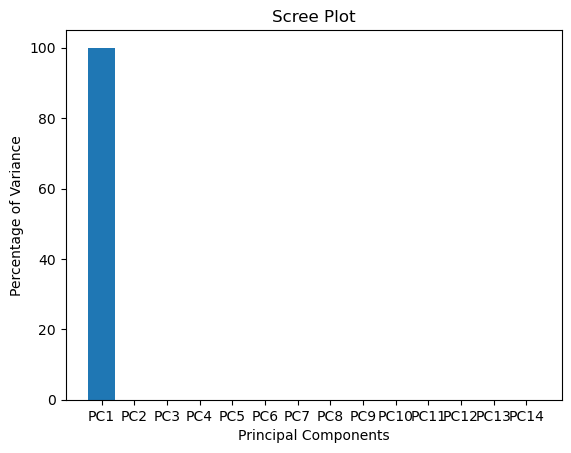

In [69]:
b_cartoon
pca_var=np.round(pca.explained_variance_ratio_* 100, decimals=1 )
labels = ['PC'+ str(s) for s in range(1, len(pca_var)+1)]

plt.bar(x= range(1, len(pca_var)+1), height = pca_var, tick_label= labels)
plt.ylabel("Percentage of Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_landDiff = std_scaler.fit_transform(texture_feature_vector)
scaled_landDiff.shape

(16, 313600)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
pca.fit_transform(scaled_landDiff)
b_texture = pca.fit_transform(scaled_landDiff)
b_texture.shape # cada fila deberia ser el b de 1 frame en 12 componentes proncipales (de 22 feature points)

/home/alicia/anaconda3/envs/solverenv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
/home/alicia/anaconda3/envs/solverenv/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


(16, 14)

In [76]:
print(sum(pca.explained_variance_ratio_))


nan


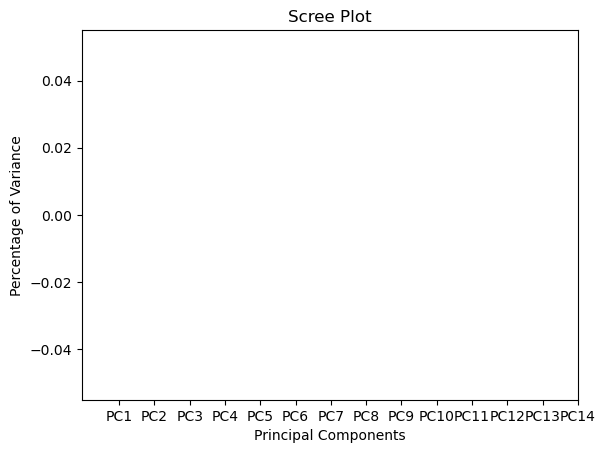

In [77]:
b_texture
pca_var=np.round(pca.explained_variance_ratio_* 100, decimals=1 )
labels = ['PC'+ str(s) for s in range(1, len(pca_var)+1)]

plt.bar(x= range(1, len(pca_var)+1), height = pca_var, tick_label= labels)
plt.ylabel("Percentage of Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()